# 2. 머신 러닝 기본

## 2.1 Linear Regression

### 선형회귀 개념

#### W 기준 시각화

[-1.         -0.95959596 -0.91919192 -0.87878788 -0.83838384 -0.7979798
 -0.75757576 -0.71717172 -0.67676768 -0.63636364 -0.5959596  -0.55555556
 -0.51515152 -0.47474747 -0.43434343 -0.39393939 -0.35353535 -0.31313131
 -0.27272727 -0.23232323 -0.19191919 -0.15151515 -0.11111111 -0.07070707
 -0.03030303  0.01010101  0.05050505  0.09090909  0.13131313  0.17171717
  0.21212121  0.25252525  0.29292929  0.33333333  0.37373737  0.41414141
  0.45454545  0.49494949  0.53535354  0.57575758  0.61616162  0.65656566
  0.6969697   0.73737374  0.77777778  0.81818182  0.85858586  0.8989899
  0.93939394  0.97979798  1.02020202  1.06060606  1.1010101   1.14141414
  1.18181818  1.22222222  1.26262626  1.3030303   1.34343434  1.38383838
  1.42424242  1.46464646  1.50505051  1.54545455  1.58585859  1.62626263
  1.66666667  1.70707071  1.74747475  1.78787879  1.82828283  1.86868687
  1.90909091  1.94949495  1.98989899  2.03030303  2.07070707  2.11111111
  2.15151515  2.19191919  2.23232323  2.27272727  2.3

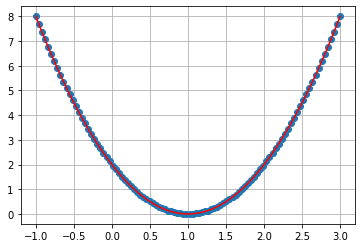

In [3]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

w = np.linspace(-1,3,100)
print(w)
b = 0

j = np.zeros(100)

for i in range(len(w)):
    y_hat = w[i]*2 + b;
    j[i] = 0.5 * (y_hat - 2)**2

plt.plot(w,j, 'o' )
plt.plot(w,j, 'r-' )

plt.grid(True)
plt.show()

#### b 기준 시각화

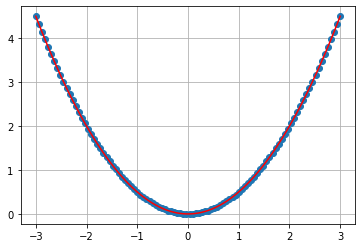

In [63]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

w = 1
b = np.linspace(-3,3,100)

j = np.zeros(100)
for i in range(len(b)):
    y_hat = w*2 + b[i];
    j[i] = 0.5 * (y_hat - 2)**2

plt.plot(b,j, 'o' )
plt.plot(b,j, 'r-' )

plt.grid(True)
plt.show()

#### W 기준 훈련 시각화

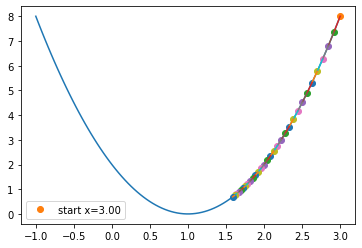

In [64]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

# simple function to demo step size
def f(x) : # A parabola
    f = 0.5*(2-x*2)**2
    return f
def Df(x) : # The derivative (gradient)
    Df = 2*(2-x*2)
    return Df
def xp1(x,alpha) : # update
    xp1 = x + alpha * Df(x)
    return xp1

def plot_steps( guess, alpha, nsteps) :
    fig, ax = plt.subplots()
    x = np.linspace(-1,3,100)
    ax.plot(x, f(x))
    x = guess
    ax.plot(x,f(x), 'o', label='start x=%.2f' %x )
    for i in range(nsteps):
        xold = x
        x = xp1(x,alpha)
        #ax.plot(x,f(x), 'o', label='x = %.2f' %x)
        ax.plot(x,f(x), 'o')
        ax.plot([xold,x],[f(xold),f(x)], '-')
    plt.legend()
    plt.show()
    
plot_steps( 3, 0.01, 30 )

#### b 기준 훈련 시각화

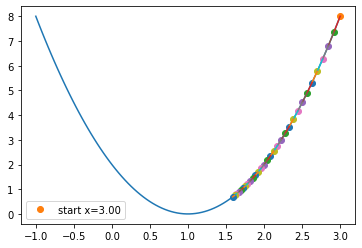

In [65]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

# simple function to demo step size
def f(x) : # A parabola
    f = 0.5*(2-x*2)**2
    return f
def Df(x) : # The derivative (gradient)
    Df = 2*(2-x*2)
    return Df
def xp1(x,alpha) : # update
    xp1 = x + alpha * Df(x)
    return xp1

def plot_steps( guess, alpha, nsteps) :
    fig, ax = plt.subplots()
    x = np.linspace(-1,3,100)
    ax.plot(x, f(x))
    x = guess
    ax.plot(x,f(x), 'o', label='start x=%.2f' %x )
    for i in range(nsteps):
        xold = x
        x = xp1(x,alpha)
        #ax.plot(x,f(x), 'o', label='x = %.2f' %x)
        ax.plot(x,f(x), 'o')
        ax.plot([xold,x],[f(xold),f(x)], '-')
    plt.legend()
    plt.show()
    
plot_steps( 3, 0.01, 30 )

### 텐서플로우로 선형회귀 구현

In [4]:
import tensorflow as tf

In [5]:
import logging    # 경고 출력 금지
logging.getLogger('tensorflow').disabled = True

### 기계 학습 문제 해결

기계 학습 문제 해결은 일반적으로 다음 단계로 구성됩니다.:

 - 훈련 데이터를 얻습니다.
 - 모델을 정의하십시오.
 - 손실 함수를 정의합니다.
 - 훈련 데이터를 실행하여 이상적인 값에서 손실을 계산합니다.
 - 손실에 대한 기울기를 계산하고 *옵티 마이저* 를 사용 하여 데이터에 맞게 변수를 조정합니다.
 - 결과를 평가하십시오.

설명을 위해이 가이드에서는 간단한 선형 모델을 개발하고, $f(x) = x * W + b$,  𝑏 , 두 개의 변수가 있습니다: $W$ (가중치) and $b$ (절편).

이것이 가장 기본적인 머신 러닝 문제입니다.:  $x$ 와 $y$, 간단한 선형 회귀 를 통해 선의 기울기와 오프셋을 찾으십시오

### Data

지도 학습은 입력 (일반적으로 x 로 표시됨 )과 출력 ( y 로 표시 , 종종 레이블 이라고 함 )을 사용합니다. 목표는 입력에서 출력 값을 예측할 수 있도록 쌍을 이룬 입력과 출력에서 ​​학습하는 것입니다.

TensorFlow에서 데이터의 각 입력은 거의 항상 텐서로 표현되며 종종 벡터입니다. 지도 학습에서 출력 (또는 예측하려는 값)도 텐서입니다.

다음은 선을 따라 점에 가우스 (일반) 노이즈를 추가하여 합성 된 데이터입니다.

In [21]:
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

x = tf.random.normal(shape=[NUM_EXAMPLES])
print(type(x))
print(x.shape)
noise = tf.random.normal(shape=[NUM_EXAMPLES])

y = x * TRUE_W + TRUE_B + noise
print(y.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
(1000,)
(1000,)


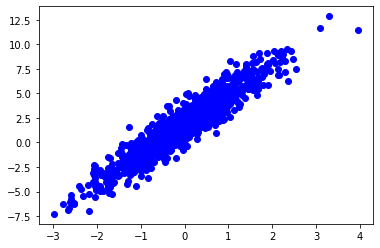

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x, y, c="b")
plt.show()

텐서는 일반적으로 일괄 적 으로 모 이거나 입력 및 출력 그룹이 함께 쌓입니다. 일괄 처리는 몇 가지 교육 이점을 제공 할 수 있으며 가속기 및 벡터화 된 계산과 잘 작동합니다. 이 데이터 세트가 얼마나 작은지를 감안할 때 전체 데이터 세트를 단일 배치로 처리 할 수 ​​있습니다.

### 모델 정의

tf.Variable모델의 모든 가중치를 나타내는 데 사용 합니다. A tf.Variable는 값을 저장하고 필요에 따라 텐서 형식으로 제공합니다. 자세한 내용은 변수 가이드 를 참조하세요.

tf.Module변수와 계산을 캡슐화하는 데 사용 합니다. 모든 Python 객체를 사용할 수 있지만 이렇게하면 쉽게 저장할 수 있습니다.

여기서 w 와 b 를 모두 변수로 정의 합니다.

In [9]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)

    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
#     print('MyModel.__call__()',x)
    return self.w * x + self.b

model = MyModel()

print("Variables:", model.variables)

assert model(3.0).numpy() == 15.0
print(model(10))

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)
tf.Tensor(50.0, shape=(), dtype=float32)


초기 변수는 여기에서 고정 된 방식으로 설정되지만 Keras에는 나머지 Keras의 유무에 관계없이 사용할 수있는 여러 초기화 프로그램 이 함께 제공됩니다.

### 손실 함수 정의

손실 함수는 주어진 입력에 대한 모델의 출력이 목표 출력과 얼마나 잘 일치하는지 측정합니다. 목표는 훈련 중에 이러한 차이를 최소화하는 것입니다. "평균 제곱"오류라고도하는 표준 L2 손실을 정의합니다.

In [28]:
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))
# (y예측값 - y실제값)의 제곱값의 평균
print(tf.reduce_mean(tf.square([2, 2, 2, 2])))

tf.Tensor(4, shape=(), dtype=int32)


모델을 학습하기 전에 모델의 예측을 빨간색으로, 학습 데이터를 파란색으로 플로팅하여 손실 값을 시각화 할 수 있습니다.

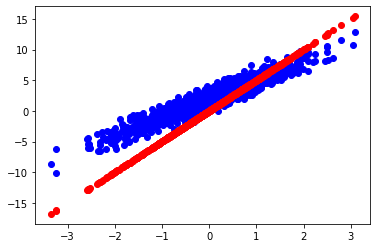

Current loss: 8.956390


In [72]:
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(y, model(x)).numpy())

### 훈련 루프 정의

훈련 루프는 순서대로 세 가지 작업을 반복적으로 수행하는 것으로 구성됩니다.:

* 모델을 통해 입력 배치를 전송하여 출력 생성
* 출력을 출력 (또는 레이블)과 비교하여 손실 계산
* 그라디언트 테이프를 사용하여 그라디언트 찾기
* 이러한 그라디언트로 변수 최적화

이 예제에서는 경사 하강 법을 사용하여 모델을 훈련 할 수 있습니다.

#### TF로 구현하는 훈련 루프

##### 샘플 1개씩 학습

In [73]:
def train(model, x, y, learning_rate):
  for x_i, y_i in zip(x,y):
      with tf.GradientTape() as t:
        current_loss = loss(y_i, model(x_i))

      dw, db = t.gradient(current_loss, [model.w, model.b])

      model.w.assign_sub(learning_rate * dw)
      model.b.assign_sub(learning_rate * db)

##### 샘플 전체 한번에 학습(batch)

In [32]:
def train(model, x, y, learning_rate):
      with tf.GradientTape() as t:
        current_loss = loss(y, model(x))

      dw, db = t.gradient(current_loss, [model.w, model.b])

      model.w.assign_sub(learning_rate * dw)
      model.b.assign_sub(learning_rate * db)

훈련을 살펴 보려면 훈련 루프를 통해 x 와 y 의 동일한 배치를 보내고 W 와 b 어떻게 업데이트 하는지 확인할 수 있습니다.

In [33]:
model = MyModel()

Ws, bs = [], []
epochs = range(10)

def training_loop(model, x, y):

  for epoch in epochs:

    train(model, x, y, learning_rate=0.1)

    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model(x))

    print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" %
          (epoch, Ws[-1], bs[-1], current_loss))

Starting: W=5.00 b=0.00, loss=9.34747
Epoch  0: W=4.58 b=0.41, loss=6.24854
Epoch  1: W=4.25 b=0.74, loss=4.30108
Epoch  2: W=3.98 b=1.00, loss=3.07719
Epoch  3: W=3.77 b=1.20, loss=2.30799
Epoch  4: W=3.61 b=1.37, loss=1.82455
Epoch  5: W=3.48 b=1.50, loss=1.52068
Epoch  6: W=3.38 b=1.60, loss=1.32969
Epoch  7: W=3.30 b=1.68, loss=1.20963
Epoch  8: W=3.23 b=1.75, loss=1.13415
Epoch  9: W=3.18 b=1.80, loss=1.08671


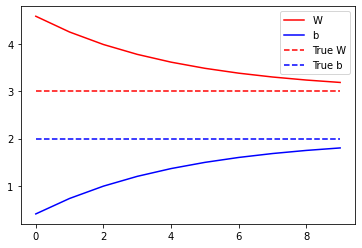

In [34]:
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

training_loop(model, x, y)

plt.plot(epochs, Ws, "r",
         epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()

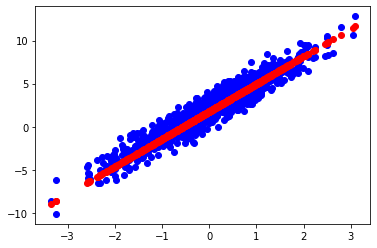

Current loss: 1.029955


In [77]:
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())

### 다변수 선형회귀 구현

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
x = tf.constant([[-1,2],[-3,4],[-5,6],[-7,8],[-9,10]], dtype=tf.float32)
y = tf.constant([[8],[10],[12],[14],[16]], dtype=tf.float32)

In [20]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)

    self.w = tf.Variable([[1.0],[1.0]])
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return tf.matmul(x, self.w) + self.b # +b는 boardcasting...

a = tf.Variable([[1.0],[1.0]])


In [25]:
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

In [26]:
def train(model, x, y, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(y, model(x))

  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw) # w is tensor, so dw apply... boardcasting.....
  model.b.assign_sub(learning_rate * db)

In [27]:
model = MyModel()

Ws, bs = [], []
epochs = range(1000)

def training_loop(model, x, y):

  for epoch in epochs:

    train(model, x, y, learning_rate=0.01)

    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model(x))
  print("ending W1=%1.2f W2=%1.2f b=%1.2f, loss=%2.5f" %
        (Ws[-1][0], Ws[-1][1],bs[-1], current_loss))

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(5, 1), dtype=float32)
Starting: W1=1.00 W2=1.00 b=0.00, loss=129.00000
ending W1=2.33 W2=3.33 b=3.66, loss=0.00002


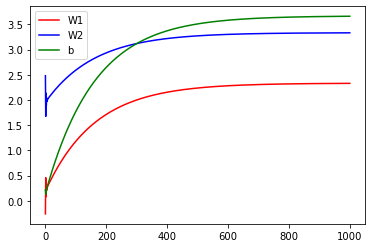

In [28]:
print(model(x))
print("Starting: W1=%1.2f W2=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w[0], model.w[1], model.b, loss(y, model(x))))

training_loop(model, x, y)

w1 = [w[0] for w in Ws ]
w2 = [w[1] for w in Ws ]
plt.plot(epochs, w1, "r",  epochs, w2, "b", epochs, bs, "g")

plt.legend(["W1", "W2", "b"])
plt.show()

In [317]:
model(x[4:5])

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[16.004015]], dtype=float32)>